# COVID-19 Analysis & Visualizations

### Import necessary tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import warnings

warnings.filterwarnings("ignore")

In [2]:
from utils import total_cases_pie, \
    total_cases_lineplot, \
    mortality_rate, \
    recovery_rate, \
    total_latest_barplot, \
    daily_cases

# Global styles for the charts
sns.set(style='darkgrid', )
plt.rc('font', size=14)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)
plt.rc('figure', figsize=(20,10), titlesize=20)
plt.rc('lines', linewidth=4)

### Load dataset

In [3]:
path_to_dataset = 'novel-corona-virus-2019-dataset'

In [4]:
data = pd.read_csv(f'{path_to_dataset}/covid_19_data.csv')

### Dataset info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 8 columns):
SNo                7617 non-null int64
ObservationDate    7617 non-null object
Province/State     4358 non-null object
Country/Region     7617 non-null object
Last Update        7617 non-null object
Confirmed          7617 non-null float64
Deaths             7617 non-null float64
Recovered          7617 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 476.1+ KB


In [6]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,7617.000000,7617.000000,7617.000000,7617.000000
mean,3809.000000,638.131417,22.004726,234.410792
std,2198.982833,4940.796105,220.773353,2670.301719
min,1.000000,0.000000,0.000000,0.000000
25%,1905.000000,2.000000,0.000000,0.000000
50%,3809.000000,16.000000,0.000000,0.000000
75%,5713.000000,125.000000,1.000000,10.000000
max,7617.000000,67800.000000,4825.000000,58946.000000


In [7]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Preprocessing

### Missing values

In [8]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3259
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [9]:
# Filling null values with `Unknown`
data.fillna('Unknown', inplace=True)

In [10]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

### Renaming countries

In [11]:
set(data['Country/Region'])

{' Azerbaijan',
 "('St. Martin',)",
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 '

In [12]:
def process_country_name(country):
    country = country.strip()
    
    if country == "('St. Martin',)":
        country = 'Saint Martin'
    elif country == 'Mainland China':
        country = 'China'
    elif country == 'UK':
        country = 'United Kingdom'
    elif country == 'US':
        country = 'United States'
    elif country == 'occupied Palestinian territory':
        country = 'Palestine'
    
    return country

In [13]:
data['Country/Region'] = data['Country/Region'].apply(process_country_name)

### Renaming columns

In [14]:
data.rename(columns={'ObservationDate': 'Observed', 'Last Update': 'Updated'}, inplace=True)

In [15]:
data.tail()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
7612,7613,03/21/2020,Unknown,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7613,7614,03/21/2020,Unknown,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7614,7615,03/21/2020,Unknown,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7615,7616,03/21/2020,Unknown,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7616,7617,03/21/2020,Unknown,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


### Normalizing dates

In [16]:
data['Observed'] = data['Observed'].apply(pd.to_datetime)
data['Updated'] = data['Updated'].apply(pd.to_datetime)

In [17]:
data.head()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,China,2020-01-22 17:00:00,0.0,0.0,0.0


### Processing columns

In [18]:
data.drop(['SNo'], axis=1, inplace=True) # We don't need this column
data['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths'] # Non recovered or active cases

## Analysis & Visualizations

In [19]:
total_cases = data.sort_values('Observed').groupby(['Observed']).sum() # index = 'Observed' column

In [20]:
total_cases\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Observed,,,,
2020-03-21 00:00:00,304528,12973,91676,199879
2020-03-20 00:00:00,272167,11299,87403,173465
2020-03-19 00:00:00,242713,9867,84962,147884
2020-03-18 00:00:00,214915,8733,83313,122869
2020-03-17 00:00:00,197168,7905,80840,108423
2020-03-16 00:00:00,181546,7126,78088,96332
2020-03-15 00:00:00,167447,6440,76034,84973
2020-03-14 00:00:00,156099,5819,72624,77656
2020-03-13 00:00:00,145193,5404,70251,69538


In [21]:
print('First Observabled Date:', min(total_cases.index).strftime('%b %d, %Y'))
print('Last Observabled Date:', max(total_cases.index).strftime('%b %d, %Y'))
print('Total days observed:', len(total_cases))

First Observabled Date: Jan 22, 2020
Last Observabled Date: Mar 21, 2020
Total days observed: 60


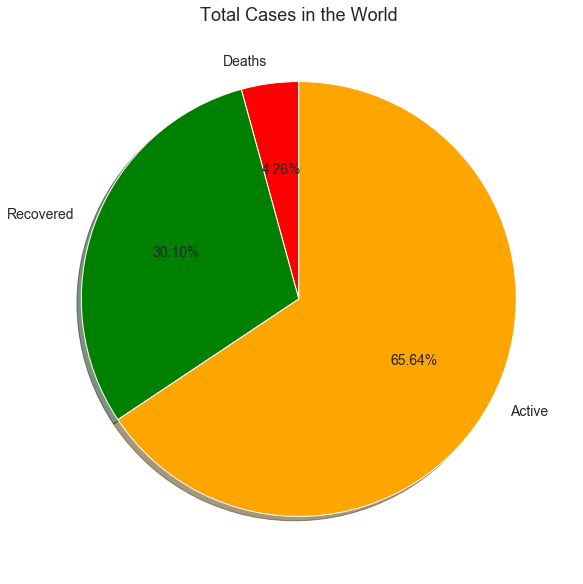

In [22]:
total_cases_pie(total_cases, 'Total Cases in the World')

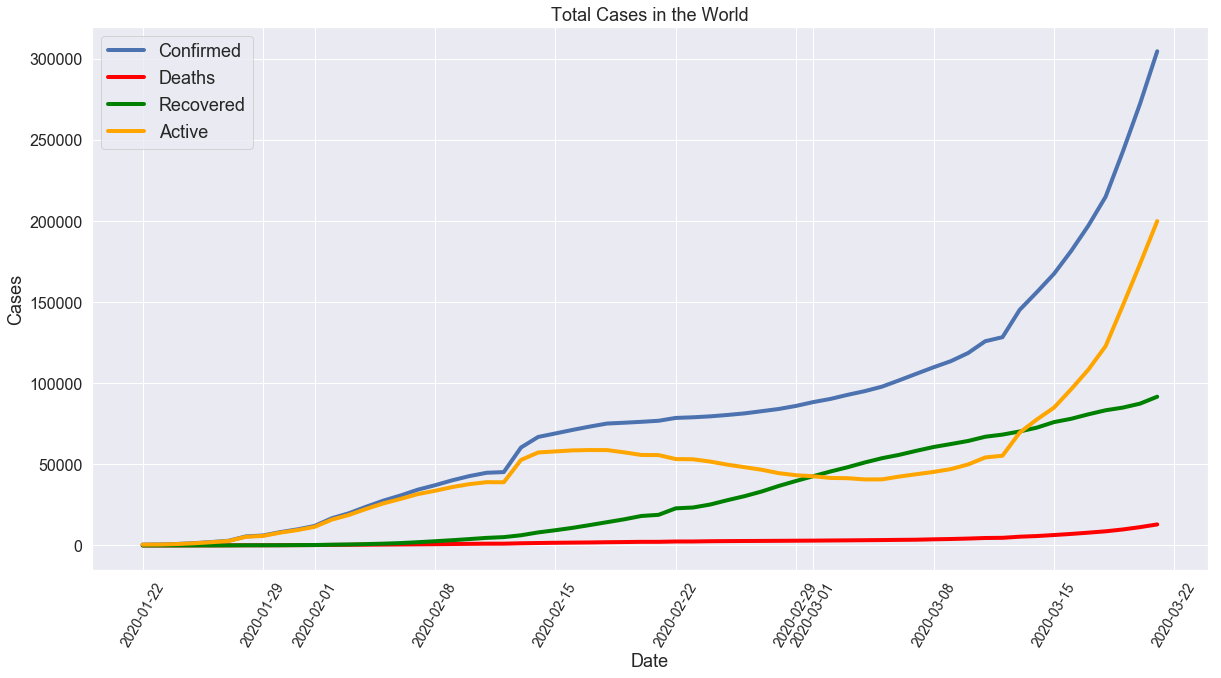

In [23]:
total_cases_lineplot(total_cases, 'Total Cases in the World')

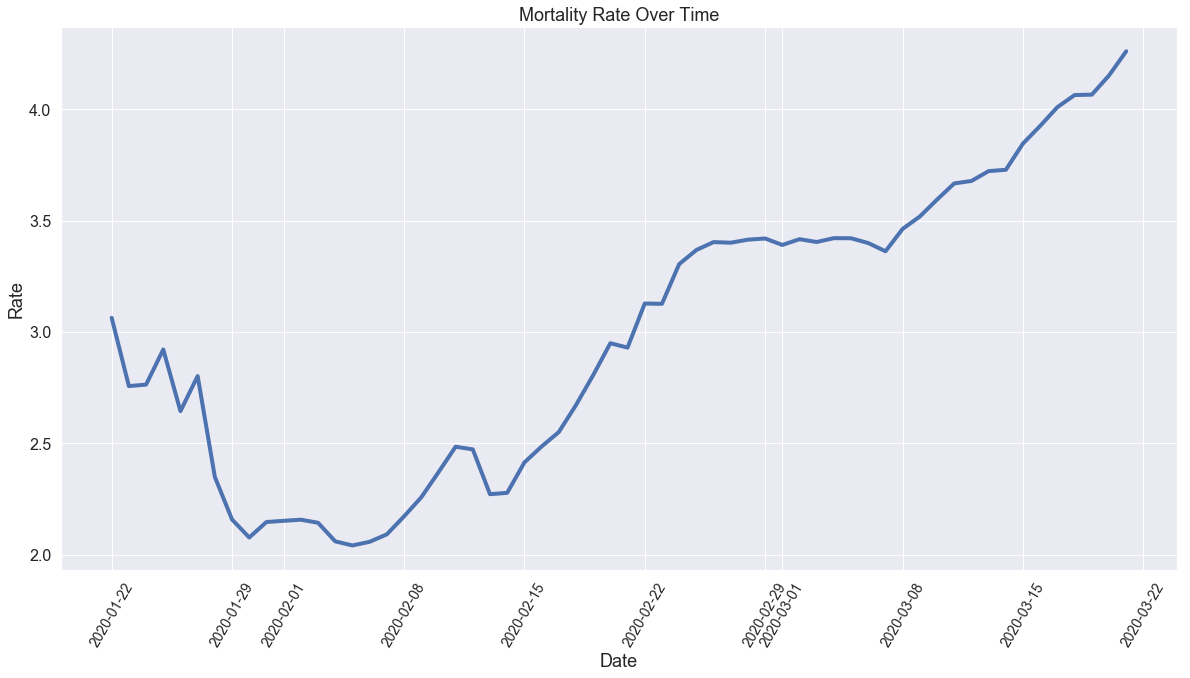

In [24]:
mortality_rate(total_cases, 'Mortality Rate Over Time')

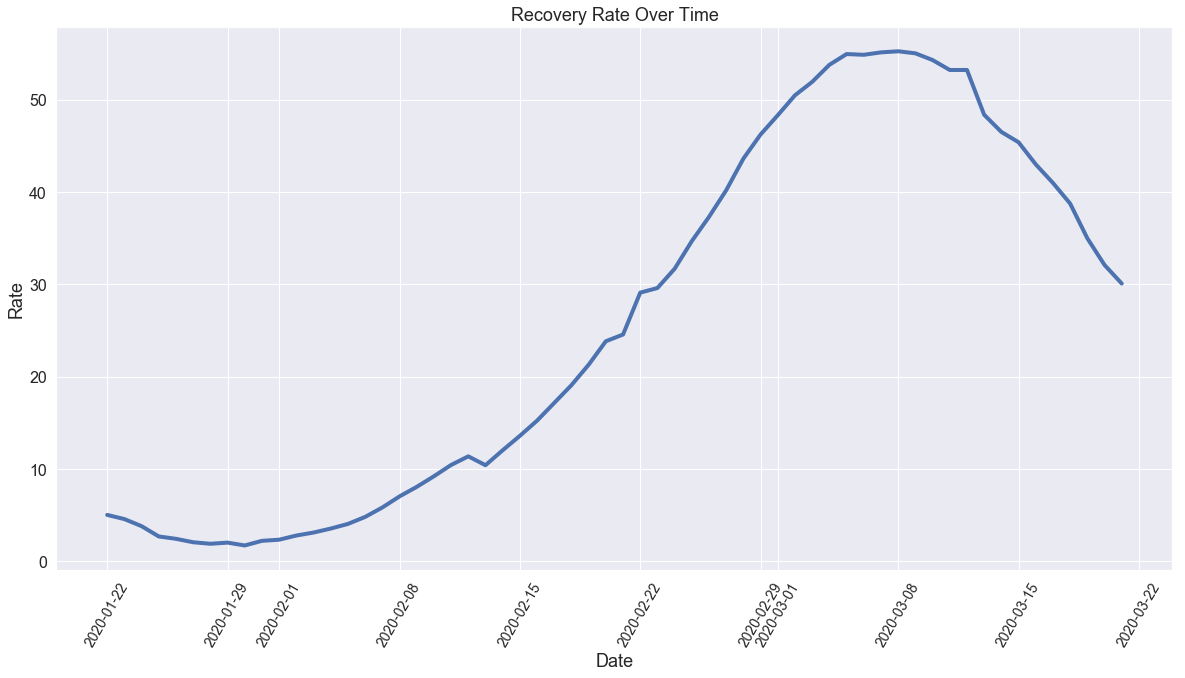

In [25]:
recovery_rate(total_cases, 'Recovery Rate Over Time')

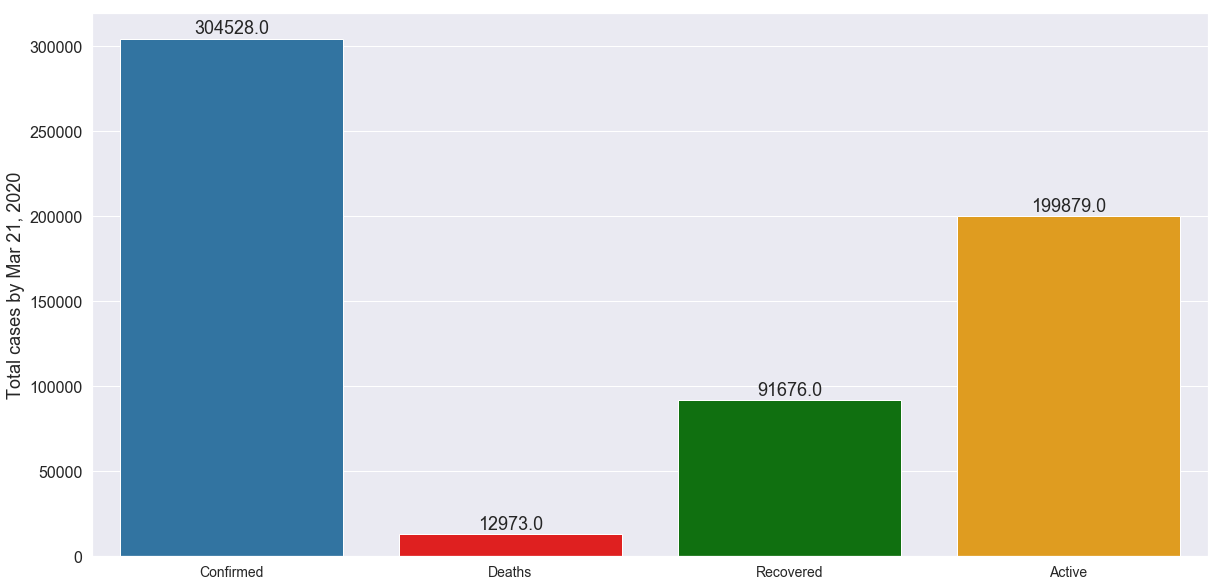

In [26]:
total_latest_barplot(total_cases)

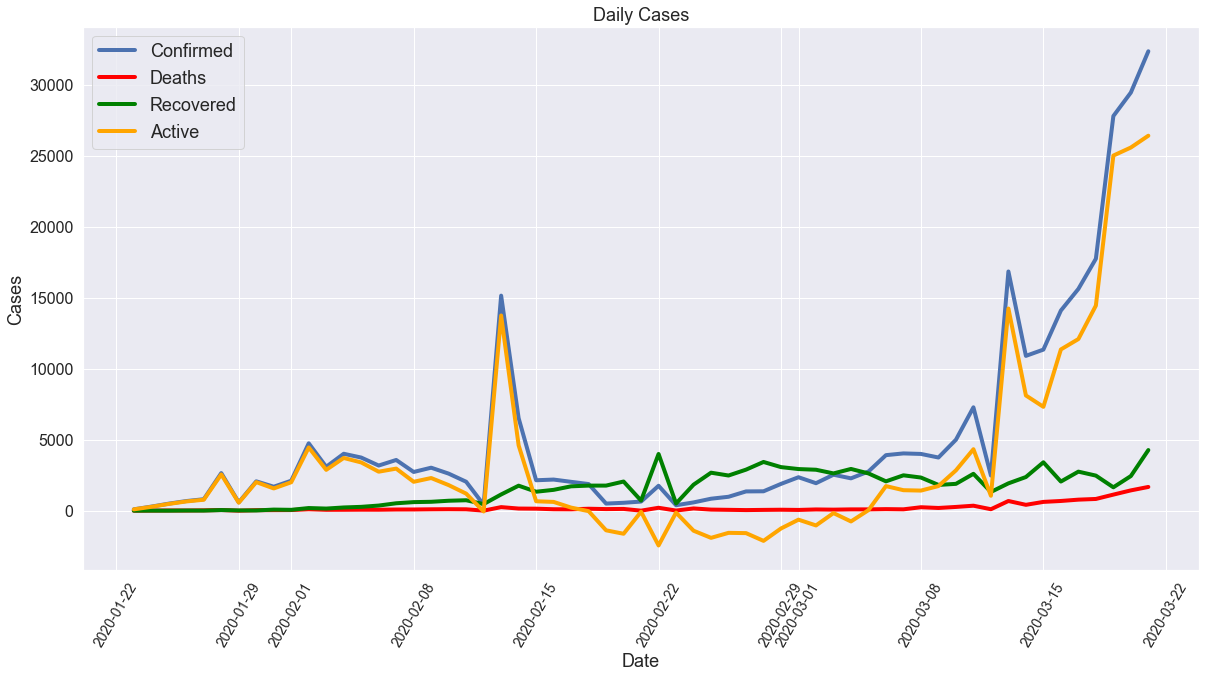

In [27]:
daily_cases(total_cases, 'Daily Cases')

## Analysis per Country

In [28]:
latest = data[data['Observed'] == max(data['Observed'])]
total_per_country = latest.groupby(['Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()

In [29]:
top_ten = total_per_country.sort_values('Confirmed', ascending=False)[:10]
top_ten.style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
China,81014,3255,71749,6010
Italy,53578,4825,6072,42681
United States,25493,307,171,25015
Spain,25374,1375,2125,21874
Germany,22213,84,233,21896
Iran,20610,1556,7635,11419
France,14308,562,12,13734
South Korea,8799,102,1540,7157
Switzerland,6575,75,15,6485


## European countries and Switzerland

In [30]:
italy = data[data['Country/Region'] == 'Italy']
spain = data[data['Country/Region'] == 'Spain']
germany = data[data['Country/Region'] == 'Germany']
france = data[data['Country/Region'] == 'France']
switzerland = data[data['Country/Region'] == 'Switzerland']
uk = data[data['Country/Region'] == 'United Kindom']

### Italy

In [37]:
total_cases_italy = italy.sort_values('Observed').groupby(['Observed']).sum()

In [38]:
total_cases_italy\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Observed,,,,
2020-03-21 00:00:00,53578,4825,6072,42681
2020-03-20 00:00:00,47021,4032,4440,38549
2020-03-19 00:00:00,41035,3405,4440,33190
2020-03-18 00:00:00,35713,2978,4025,28710
2020-03-17 00:00:00,31506,2503,2941,26062
2020-03-16 00:00:00,27980,2158,2749,23073
2020-03-15 00:00:00,24747,1809,2335,20603
2020-03-14 00:00:00,21157,1441,1966,17750
2020-03-13 00:00:00,17660,1266,1439,14955


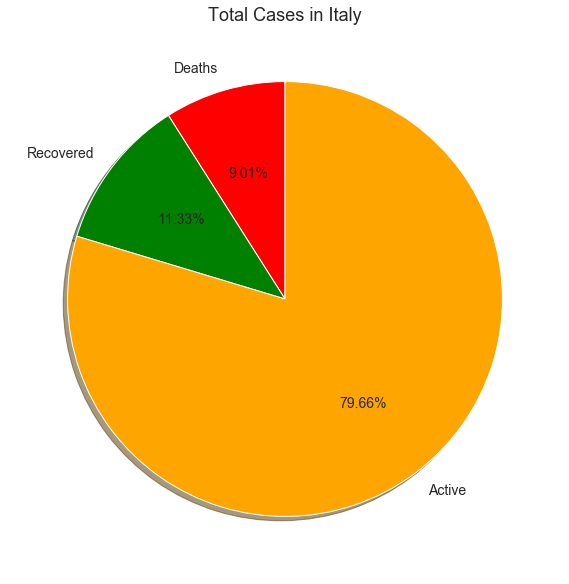

In [39]:
total_cases_pie(total_cases_italy, 'Total Cases in Italy')

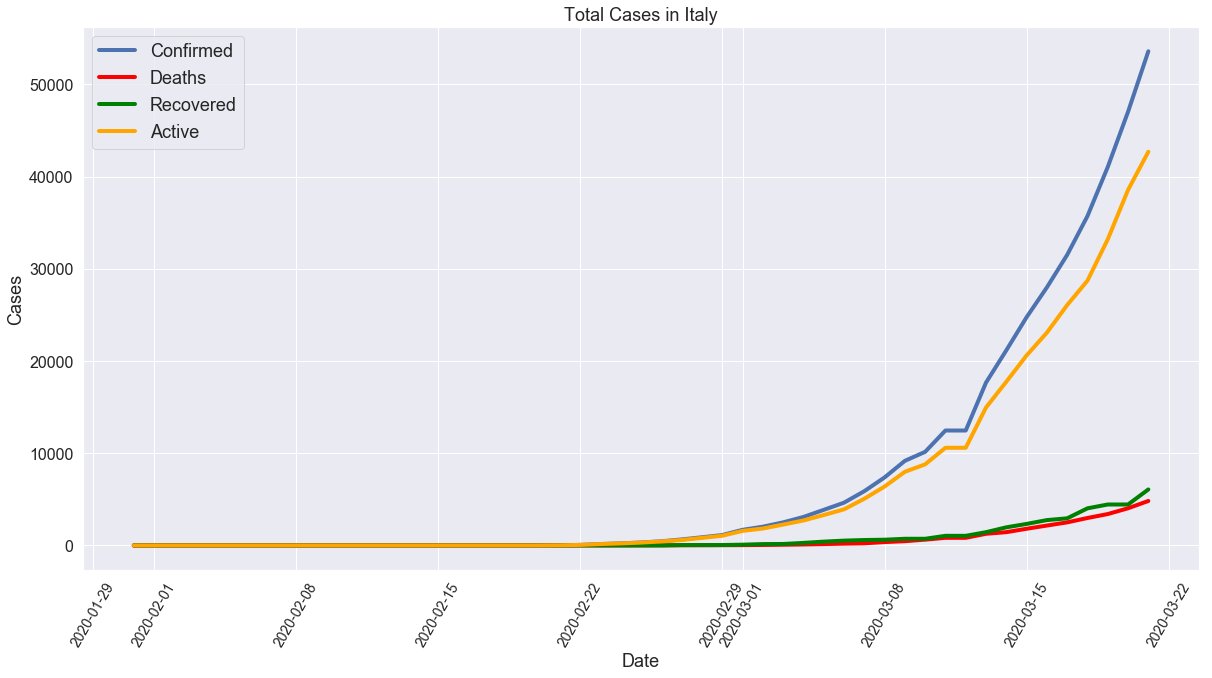

In [40]:
total_cases_lineplot(total_cases_italy, 'Total Cases in Italy')

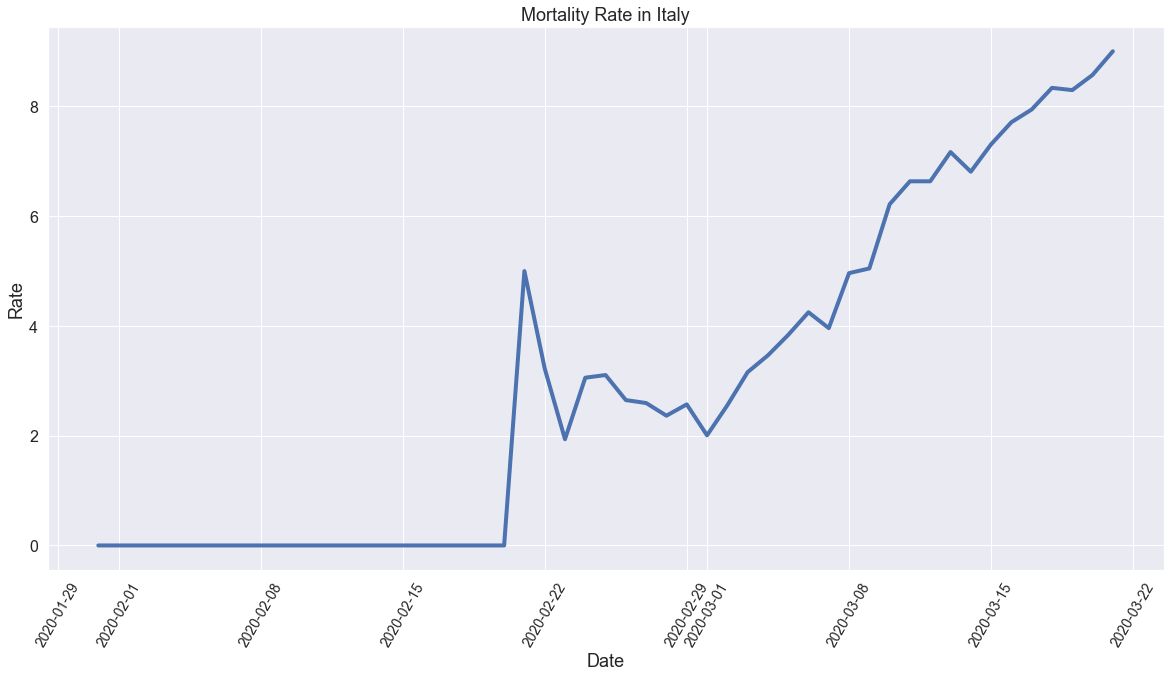

In [41]:
mortality_rate(total_cases_italy, 'Mortality Rate in Italy')

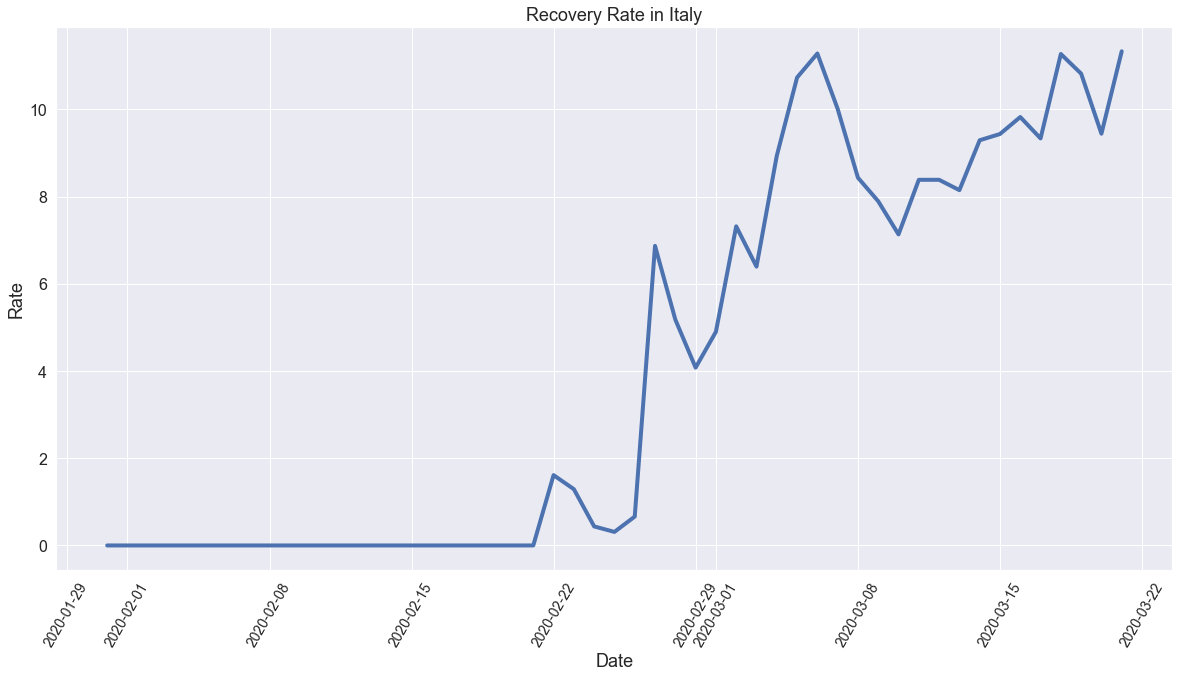

In [42]:
recovery_rate(total_cases_italy, 'Recovery Rate in Italy')

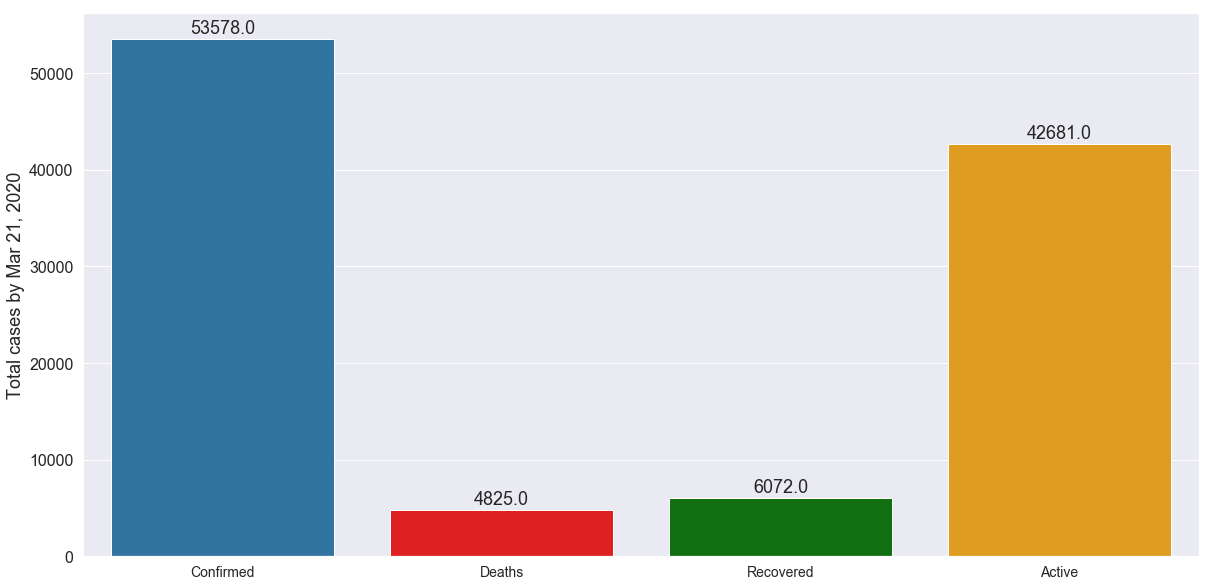

In [43]:
total_latest_barplot(total_cases_italy)

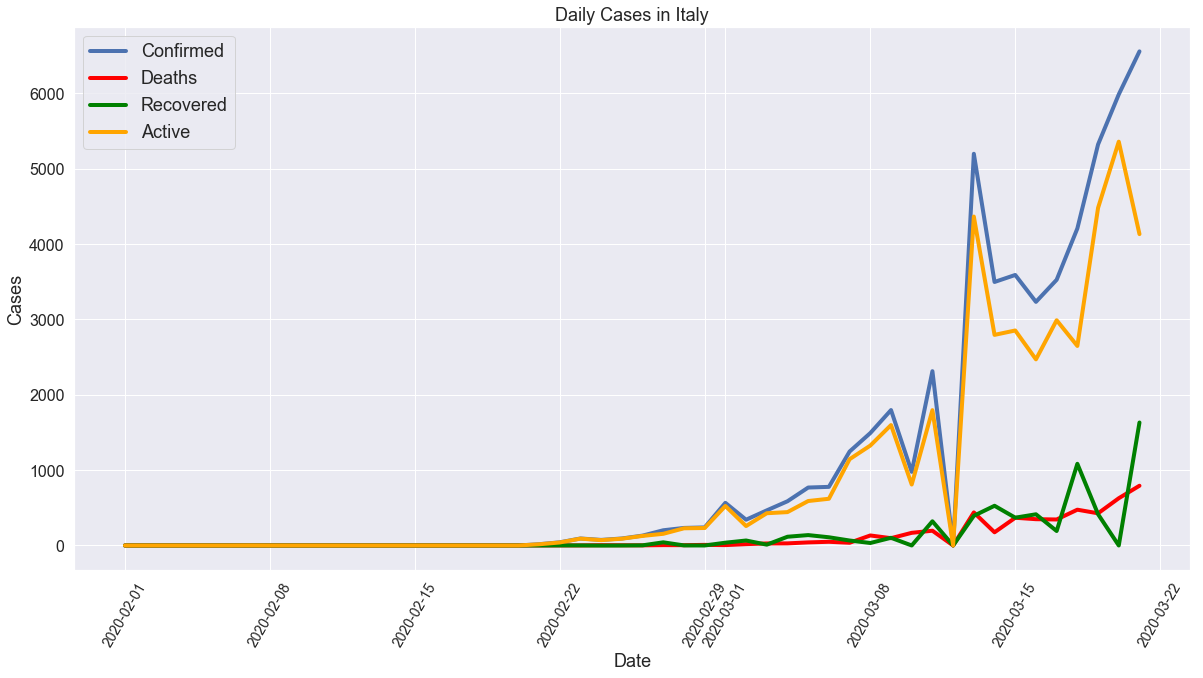

In [44]:
daily_cases(total_cases_italy, 'Daily Cases in Italy')

### Loading some more details

In [ ]:
details_in_Hubei = pd.read_csv(f'{path_to_dataset}/COVID19_2020_open_line_list - Hubei.csv')
details_outside_Hubei = pd.read_csv(f'{path_to_dataset}/COVID19_2020_open_line_list - outside_Hubei.csv')

In [ ]:
details = pd.concat([details_in_Hubei, details_outside_Hubei], ignore_index=True)

### Listing Symptoms

In [ ]:
symptoms = sorted([ item for item in list(set(details['symptoms'])) if type(item) == str])

In [ ]:
dfSymptoms = pd.DataFrame.from_dict({'Symptoms': symptoms})

# Aligning to the left
dfSymptoms.style\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

### Distribution of Ages

In [ ]:
def process_age_column(age_range):
    try:
        return np.mean(list(map(lambda age: int(age), age_range.split('-'))))
    except:
        return None

In [ ]:
ages = details['age'].apply(process_age_column)

In [ ]:
ages = ages[ages.isna() == False]

In [ ]:
ages.describe()

In [ ]:
sns.boxplot(ages)
plt.title('Distribution of Ages')

### Sex Distribution

In [ ]:
sex = details[details['sex'].isnull() == False]['sex'].apply(lambda sex: sex.lower()).value_counts()

In [ ]:
plt.pie(sex, 
        labels=['Male', 'Female'], 
        colors=['#1f77b4', '#c72481'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
plt.title('Sex Distribution')

### Based on Outcome

In [ ]:
outcome = details[details['outcome'].isnull() == False][['age', 'sex', 'outcome']]

In [ ]:
set(outcome['outcome'].apply(lambda x: x.lower()))

In [ ]:
import re

def process_outcome(outcome):
    outcome = outcome.lower()
    if outcome == 'dead' or outcome == 'death' or outcome == 'died':
        return 'dead'
    elif re.search('discharge', outcome) or re.search('recover', outcome) or re.search('released', outcome):
        return 'recovered'
    elif re.search('critical', outcome) or re.search('intensive care', outcome) or outcome == 'severe':
        return 'critical'
    elif outcome == 'not hospitalized':
        return outcome
    elif re.search('currently hospitalized', outcome):
        return 'stable'
    else:
        return 'Unknown'

outcome['outcome'] = outcome['outcome'].apply(process_outcome)

In [ ]:
critical_age = outcome[\
                       (outcome['age'].isnull() == False) & \
                       (outcome['outcome'].isin(['critical', 'dead']))\
                      ]['age'].apply(process_age_column)

In [ ]:
sns.boxplot(critical_age)
_ = plt.title('Distribution of Critical Age ')

In [ ]:
critical_sex = outcome[\
                       (outcome['sex'].isnull() == False) & \
                       (outcome['outcome'].isin(['critical', 'dead']))\
                      ]['sex']

In [ ]:
plt.pie(critical_sex.value_counts(), 
        labels=['Male', 'Female'], 
        colors=['#1f77b4', '#c72481'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
_ = plt.title('Sex Distribution for Critical/Dead cases')